# Project: Wrangling and Analyze Data

## 1. Data Gathering
Data is gathered from different sources related to @dogrates, a twitter account that post pictures of dogs and rates them in a funny manner. Data wrangling techniques learnt during the 2nd phase of the course will be used to wrangle @dogrates twitter actiivity. My aim is to wrangle this data for reliable analyses and visualization.

There are three data sources for this project; The WeRateDogs Twitter archive provided by Udacity. This contains basic tweet data for all 5000+ of their tweets, but not everything I need, The tweet image predictions and Additional Data via the Twitter API like tweet_ID, retweet etc.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import tweepy as tw
import requests
import json
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [2]:
#reading in the csv as a pandas dataframe
dog_rates_archive = pd.read_csv('twitter-archive-enhanced.csv', sep = ',')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#download image_predictions.tsv from udacity programmatically using the Requests library
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#create file
with open(os.path.join(url.split('/')[-1]), mode='wb') as file:
        file.write(response.content)
        
#Import the tweet image predictions TSV file into a DataFrame
img_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
start = timer()
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in dog_rates_archive.tweet_id:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except: continue

In [6]:
# creating a dataframe from the tweet_json.txt file
df = []
with open('tweet-json.txt') as f:
    for line in f:
        tweet = (json.loads(line))
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        create_date = tweet['created_at']
        df.append({'retweet_count' : retweet_count,
                  'favorite_count' : favorite_count,
                  'create_date' : create_date,
                  'tweet_id' : tweet_id})
        
# Convert the list of dictionaries to a pandas DataFrame
tweets = pd.DataFrame(df, columns = ['tweet_id', 'retweet_count', 'favorite_count', 'create_date'])

## Assessing Data
In this section, I am going to assess the dataset visually and programmatically to detect its tidiness, quality and structure. Any discrepancy noticed will be noted down so I can clean them for accuracy.

##### A. Visual Assessment: Each piece of gathered data is displayed in the Jupyter Notebook for visual assessment.

In [7]:
#displaying the first rows of the archives dataframe
dog_rates_archive.head

<bound method NDFrame.head of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689          

In [8]:
#displaying the first rows of the image predictions dataframe
img_predictions.head

<bound method NDFrame.head of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    6660711932215091

In [9]:
#displaying the first rows of the tweets dataframe
tweets.head

<bound method NDFrame.head of                 tweet_id  retweet_count  favorite_count  \
0     892420643555336193           8853           39467   
1     892177421306343426           6514           33819   
2     891815181378084864           4328           25461   
3     891689557279858688           8964           42908   
4     891327558926688256           9774           41048   
5     891087950875897856           3261           20562   
6     890971913173991426           2158           12041   
7     890729181411237888          16716           56848   
8     890609185150312448           4429           28226   
9     890240255349198849           7711           32467   
10    890006608113172480           7624           31166   
11    889880896479866881           5156           28268   
12    889665388333682689           8538           38818   
13    889638837579907072           4735           27672   
14    889531135344209921           2321           15359   
15    889278841981685760  

##### B. Programmatic assessment: Using Pandas functions to assess the data.

In [10]:
#Check for detailed info on null values and datatypes
dog_rates_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
#Check for detailed info on null values and datatypes
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [12]:
#Check for detailed info on null values and datatypes
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
create_date       2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [13]:
#check for rows and columns
dog_rates_archive.shape

(2356, 17)

In [14]:
#check for rows and columns
img_predictions.shape

(2075, 12)

In [15]:
#check for rows and columns
tweets.shape

(2354, 4)

checking for duplicates in the 3 dataframes

In [16]:
dog_rates_archive[dog_rates_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


There are no duplicates in the archive dataset

In [17]:
img_predictions[img_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


There are no duplicates in the image dataset

In [18]:
tweets[tweets.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count,create_date


There are no duplicates in the json file

Read the value counts for the different tweet sources and names in dog_rates_archive.

In [19]:
dog_rates_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

The value count on source indicates that we have 3 twitter sources

In [20]:
dog_rates_archive.name.value_counts()

None         745
a             55
Charlie       12
Lucy          11
Cooper        11
Oliver        11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
the            8
Sadie          8
Buddy          7
Bailey         7
Toby           7
Daisy          7
an             7
Jack           6
Jax            6
Milo           6
Rusty          6
Koda           6
Stanley        6
Scout          6
Dave           6
Bella          6
Oscar          6
Leo            6
Chester        5
            ... 
Sora           1
my             1
Mojo           1
Butters        1
Lenox          1
Gert           1
Maxwell        1
Mauve          1
Katie          1
Tove           1
Taco           1
Tassy          1
Robin          1
Deacon         1
Fletcher       1
Sprinkles      1
Mookie         1
Franq          1
Lili           1
Hamrick        1
Swagger        1
Lupe           1
Kane           1
Barney         1
Geoff          1
Noosh          1
Danny          1
Brutus        

The result shows that there are some name anomarlies that will need to be cleaned.

checking the ratings for each of the dogs in the dog_rates_archive

In [21]:
#numerator ratings
dog_rates_archive.rating_numerator.value_counts().sort_index()

0         2
1         9
2         9
3        19
4        17
5        37
6        32
7        55
8       102
9       158
10      461
11      464
12      558
13      351
14       54
15        2
17        1
20        1
24        1
26        1
27        1
44        1
45        1
50        1
60        1
75        2
80        1
84        1
88        1
99        1
121       1
143       1
144       1
165       1
182       1
204       1
420       2
666       1
960       1
1776      1
Name: rating_numerator, dtype: int64

In [22]:
#denominator ratings
dog_rates_archive.rating_denominator.value_counts().sort_index()

0         1
2         1
7         1
10     2333
11        3
15        1
16        1
20        2
40        1
50        3
70        1
80        2
90        1
110       1
120       1
130       1
150       1
170       1
Name: rating_denominator, dtype: int64

Check the number of different dog stages seen in Tweets

In [23]:
doggo = dog_rates_archive.doggo.value_counts()
print(doggo)

None     2259
doggo      97
Name: doggo, dtype: int64


In [24]:
floofer = dog_rates_archive.floofer.value_counts()
print(floofer)

None       2346
floofer      10
Name: floofer, dtype: int64


In [25]:
pupper = dog_rates_archive.pupper.value_counts()
print(pupper)

None      2099
pupper     257
Name: pupper, dtype: int64


In [26]:
puppo = dog_rates_archive.puppo.value_counts()
print(puppo)

None     2326
puppo      30
Name: puppo, dtype: int64


Using the value.count function, I can see that the dog stages have different None values and will need to be cleaned for proper analysis.

## Issues

### Quality issues
1. Retweets and Replies in the dog_rates_archive: Remove retweeted tweets

2. Alot of columns: Drop redundant columns 

3. Null values: Remove null values

4. Incorrect Datatypes: Fix the appropriate Datatypes to each columns

5. Abbreviated names: Rename columns headers to more accurate names

6. Incorrect names in the name column: Corrrect invalid names like a,an etc.

7. Ratings figures: Remove rating_denominator not equal to 10 and remove rating_numerator before 10 and after 15

8. Tweet links: Remove links in text

### Tidiness issues
1. Merge the 4 different dog_stages into one column to avoid having a bulky dataset.

2. Concise Dataframe: Merge the 3 dataframes after correcting quality issues to give a comprehensive dataset.

## Cleaning Data
The 3 dataframes would be cleaned for quality and tidy information using the Define, Code and Test method. 

In [27]:
# Make copies of original pieces of data
dog_rates_archive_clean = dog_rates_archive.copy()
img_predictions_clean = img_predictions.copy()
tweets_clean = tweets.copy()

### Issue #1: Retweets and Replies in the dog_rates_archive: Remove retweeted tweets

#### Define: Delete retweeted tweets (Only want original ratings that have images)

#### Code

In [28]:
#Drop replied tweets
dog_rates_archive_clean = dog_rates_archive_clean[dog_rates_archive_clean['in_reply_to_status_id'].isnull()]

In [29]:
#Drop retweets from the dog_rates_dataframe
dog_rates_archive_clean = dog_rates_archive_clean[dog_rates_archive_clean['retweeted_status_id'].isnull()]

#### Test

In [30]:
dog_rates_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

In [31]:
dog_rates_archive_clean.retweeted_status_id.value_counts(dropna=False)

NaN    2097
Name: retweeted_status_id, dtype: int64

### Issue #2: Alot of columns: Drop redundant columns

#### Define: Remove redundant columns and duplicates

#### Code

In [32]:
#Drop columns we don't need
dog_rates_archive_clean = dog_rates_archive_clean.drop('retweeted_status_id', 1)
dog_rates_archive_clean = dog_rates_archive_clean.drop('retweeted_status_user_id', 1)
dog_rates_archive_clean = dog_rates_archive_clean.drop('retweeted_status_timestamp', 1)
dog_rates_archive_clean = dog_rates_archive_clean.drop('in_reply_to_user_id', 1)
dog_rates_archive_clean = dog_rates_archive_clean.drop('in_reply_to_status_id', 1)

In [33]:
#Drop duplicated tweet_id
dog_rates_archive_clean = dog_rates_archive_clean.drop_duplicates()

In [34]:
#Drop tweets with no pictures and pre
img_predictions_clean = img_predictions_clean.dropna(subset = ['jpg_url'])

#### Test

In [35]:
dog_rates_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [36]:
img_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Issue #3: Null values: Remove null values

#### Define: Drop Null values to avoid inaccurate conclusions

#### Code

In [37]:
dog_rates_archive_clean.dropna(axis='columns',how='any', inplace=True)

#### Test

In [38]:
print(dog_rates_archive_clean)

                tweet_id                  timestamp  \
0     892420643555336193  2017-08-01 16:23:56 +0000   
1     892177421306343426  2017-08-01 00:17:27 +0000   
2     891815181378084864  2017-07-31 00:18:03 +0000   
3     891689557279858688  2017-07-30 15:58:51 +0000   
4     891327558926688256  2017-07-29 16:00:24 +0000   
5     891087950875897856  2017-07-29 00:08:17 +0000   
6     890971913173991426  2017-07-28 16:27:12 +0000   
7     890729181411237888  2017-07-28 00:22:40 +0000   
8     890609185150312448  2017-07-27 16:25:51 +0000   
9     890240255349198849  2017-07-26 15:59:51 +0000   
10    890006608113172480  2017-07-26 00:31:25 +0000   
11    889880896479866881  2017-07-25 16:11:53 +0000   
12    889665388333682689  2017-07-25 01:55:32 +0000   
13    889638837579907072  2017-07-25 00:10:02 +0000   
14    889531135344209921  2017-07-24 17:02:04 +0000   
15    889278841981685760  2017-07-24 00:19:32 +0000   
16    888917238123831296  2017-07-23 00:22:39 +0000   
17    8888

In [39]:
dog_rates_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Issue #4: Incorrect Datatypes: Fix the appropriate Datatypes to each columns

#### Define: Changing the datatypes of some columns to the appropriate datatypes

#### Code

In [40]:
#Change time_stamp to datetime datatype 

dog_rates_archive_clean['timestamp'] = pd.to_datetime(dog_rates_archive_clean.timestamp)

In [41]:
#Change tweet_id to str datatype
dog_rates_archive_clean['tweet_id'] = dog_rates_archive_clean['tweet_id'].astype(str)
img_predictions_clean['tweet_id'] = img_predictions_clean['tweet_id'].astype(str)
tweets_clean['tweet_id'] = tweets_clean['tweet_id'].astype(str)

In [42]:
#Change rating_numerator to float datatype
dog_rates_archive_clean['rating_numerator'] = dog_rates_archive_clean['rating_numerator'].astype(float)

In [43]:
#Change rating_denominator to float datatype
dog_rates_archive_clean['rating_denominator'] = dog_rates_archive_clean['rating_denominator'].astype(float)

#### Test

In [44]:
dog_rates_archive_clean.info()
img_predictions_clean.info()
tweets_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null float64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: datetime64[ns](1), float64(2), object(8)
memory usage: 196.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p

### Issue #5: Abbreviated names: Rename columns headers to more accurate names in img_predictions

#### Define: Renaming some columns for easy understanding

#### Code

In [45]:
img_predictions_clean.rename(columns={'p1': 'Prediction1', 'p2': 'Prediction2', 'p3': 'Prediction3'}, inplace=True)
img_predictions_clean.rename(columns={'p1_conf': 'Prediction1_conf', 'p1_dog': 'Prediction1_dog'}, inplace=True)
img_predictions_clean.rename(columns={'p2_conf': 'Prediction2_conf', 'p2_dog': 'Prediction2_dog'}, inplace=True)
img_predictions_clean.rename(columns={'p3_conf': 'Prediction3_conf', 'p3_dog': 'Prediction3_dog'}, inplace=True)

In [46]:
#Drop configuration columns
img_predictions_clean.drop(columns=['Prediction1_conf', 'Prediction2_conf', 'Prediction3_conf'], inplace=True)

#### Test

In [47]:
img_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2074
Data columns (total 9 columns):
tweet_id           2075 non-null object
jpg_url            2075 non-null object
img_num            2075 non-null int64
Prediction1        2075 non-null object
Prediction1_dog    2075 non-null bool
Prediction2        2075 non-null object
Prediction2_dog    2075 non-null bool
Prediction3        2075 non-null object
Prediction3_dog    2075 non-null bool
dtypes: bool(3), int64(1), object(5)
memory usage: 119.6+ KB


### Issue #6: Incorrect names in the name column: Corrrect invalid names like a,an etc.

#### Define: Correct invalid names to avoid inaccurate conclusion

#### code

In [48]:
#correct incorrect names
dog_rates_archive_clean.name = dog_rates_archive_clean.name.str.replace('^[a-z]+', 'None')

#### Test

In [49]:
dog_rates_archive_clean['name'].value_counts()

None       707
Charlie     11
Lucy        11
Oliver      10
Cooper      10
Tucker       9
Penny        9
Sadie        8
Winston      8
Lola         8
Daisy        7
Toby         7
Stanley      6
Jax          6
Bo           6
Oscar        6
Bella        6
Koda         6
Bailey       6
Chester      5
Louis        5
Bentley      5
Leo          5
Rusty        5
Buddy        5
Dave         5
Milo         5
Scout        5
Gary         4
Gus          4
          ... 
Mason        1
Erik         1
Georgie      1
Jerome       1
Joshwa       1
Jaycob       1
Kenzie       1
Marvin       1
Petrick      1
Shadoe       1
Brockly      1
Dobby        1
Obie         1
Sweets       1
Barry        1
Cora         1
Jamesy       1
Mike         1
Emanuel      1
Bobbay       1
Dante        1
Pippin       1
Sobe         1
Iggy         1
Jed          1
Tyrone       1
Divine       1
Happy        1
Dot          1
Boots        1
Name: name, Length: 930, dtype: int64

### Issue #7: Ratings figures: Remove rating_denominator not equal to 10 and remove rating_numerator before 10 and after 15

#### Define: Inaccurate denominator and numerator rating, that needs to be cleaned

#### Code

In [50]:
#Remove rows with denominator != 10
dog_rates_archive_clean.drop(dog_rates_archive_clean[dog_rates_archive_clean.rating_denominator != 10].index, inplace = True)

In [51]:
#Remove rows with numerator less than 10 and more than 15
dog_rates_archive_clean = dog_rates_archive_clean[(dog_rates_archive_clean['rating_numerator'] >= 10) & (dog_rates_archive_clean['rating_numerator']<= 15)]

In [52]:
dog_rates_archive_clean['rating_numerator'] = dog_rates_archive_clean['rating_numerator'].astype(float)
dog_rates_archive_clean['rating_denominator'] = dog_rates_archive_clean['rating_denominator'].astype(float)

In [53]:
decimal_rating=dog_rates_archive_clean.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True)

#### Test

In [54]:
dog_rates_archive_clean[dog_rates_archive_clean['rating_denominator'] != 10]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [55]:
dog_rates_archive_clean.rating_numerator.value_counts()

12.0    486
10.0    436
11.0    413
13.0    287
14.0     38
Name: rating_numerator, dtype: int64

### Issue #8: Tweet links: Remove http links in text

#### Define: Remove links to improve data quality

#### Code

In [56]:
#Remove links in text and html tag from source
dog_rates_archive_clean['text'] = dog_rates_archive_clean['text'].str.replace('r"http\S+"', '', case=False)
dog_rates_archive_clean['source'] =dog_rates_archive_clean.source.str.extract('>([\w\W\s]*)<', expand=True)

#### Test

In [57]:
dog_rates_archive_clean['text'].head(5)

0    This is Phineas. He's a mystical boy. Only eve...
1    This is Tilly. She's just checking pup on you....
2    This is Archie. He is a rare Norwegian Pouncin...
3    This is Darla. She commenced a snooze mid meal...
4    This is Franklin. He would like you to stop ca...
Name: text, dtype: object

### Issue #9: Merge the 4 different dog_stages into one column to avoid having a bulky dataset.

#### Define: Merge the dog stages to avoid bulky data

#### Code

In [58]:
dog_rates_archive_clean['dog_stages'] = dog_rates_archive_clean['doggo'] + '-' + dog_rates_archive_clean['floofer'] + '-' + dog_rates_archive_clean['pupper'] + '-' + dog_rates_archive_clean['puppo']

In [59]:
dog_rates_archive_clean['dog_stages'] = dog_rates_archive_clean['dog_stages'].replace(['None-None-None-None', 'doggo-None-None-None','None-floofer-None-None','None-None-pupper-None','None-None-None-puppo','doggo-None-None-puppo','doggo-None-pupper-None','doggo-floofer-None-None'],['None', 'doggo','floofer','pupper','puppo','doggo','doggo','doggo'])

In [60]:
#drop doggo,floofer,pupper and puppo columns
dog_rates_archive_clean.drop(columns=['doggo', 'floofer', 'pupper','puppo'], inplace=True)

#### Test

In [61]:
dog_rates_archive_clean.dog_stages.value_counts()

None       1369
pupper      181
doggo        79
puppo        22
floofer       9
Name: dog_stages, dtype: int64

In [62]:
dog_rates_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1660 entries, 0 to 2350
Data columns (total 8 columns):
tweet_id              1660 non-null object
timestamp             1660 non-null datetime64[ns]
source                1660 non-null object
text                  1660 non-null object
rating_numerator      1660 non-null float64
rating_denominator    1660 non-null float64
name                  1660 non-null object
dog_stages            1660 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 116.7+ KB


### Issue #10: Concise Dataframe: Merge the 3 dataframes after correcting quality issues to give a comprehensive dataset.

#### Define: A high quality tidy  dataset  with all 3 gathered datasets.

#### Code: 

In [63]:
#create a master cleaned dataset
twitter_archive_master = pd.merge(tweets_clean,dog_rates_archive_clean)
twitter_archive_master = twitter_archive_master.merge(img_predictions_clean)

#### Test

In [64]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1540
Data columns (total 19 columns):
tweet_id              1541 non-null object
retweet_count         1541 non-null int64
favorite_count        1541 non-null int64
create_date           1541 non-null object
timestamp             1541 non-null datetime64[ns]
source                1541 non-null object
text                  1541 non-null object
rating_numerator      1541 non-null float64
rating_denominator    1541 non-null float64
name                  1541 non-null object
dog_stages            1541 non-null object
jpg_url               1541 non-null object
img_num               1541 non-null int64
Prediction1           1541 non-null object
Prediction1_dog       1541 non-null bool
Prediction2           1541 non-null object
Prediction2_dog       1541 non-null bool
Prediction3           1541 non-null object
Prediction3_dog       1541 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(2), int64(3), object(10)
memory

In [65]:
twitter_archive_master.head(20)

,tweet_id,retweet_count,favorite_count,create_date,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,Prediction1,Prediction1_dog,Prediction2,Prediction2_dog,Prediction3,Prediction3_dog
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,False,bagel,False,banana,False
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True,Pekinese,True,papillon,True
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,True,malamute,True,kelpie,True
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,False,Labrador_retriever,True,spatula,False
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,English_springer,True,German_short-haired_pointer,True
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017,2017-07-29 00:08:17,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,True,Irish_terrier,True,Indian_elephant,False
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017,2017-07-28 16:27:12,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,True,Border_collie,True,ice_lolly,False
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017,2017-07-28 00:22:40,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,None,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,True,Eskimo_dog,True,Pembroke,True
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017,2017-07-27 16:25:51,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,None,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,True,Irish_setter,True,Chesapeake_Bay_retriever,True
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017,2017-07-26 15:59:51,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,True,Cardigan,True,Chihuahua,True


In [66]:
#looking at the dataset virtually, create_date and timestamp are redundant.
#Remove create_date column
twitter_archive_master = twitter_archive_master.drop(['create_date'], axis = 1)

In [69]:
twitter_archive_master.head()

,tweet_id,retweet_count,favorite_count,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,Prediction1,Prediction1_dog,Prediction2,Prediction2_dog,Prediction3,Prediction3_dog
0,892420643555336193,8853,39467,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,False,bagel,False,banana,False
1,892177421306343426,6514,33819,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,True,Pekinese,True,papillon,True
2,891815181378084864,4328,25461,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,True,malamute,True,kelpie,True
3,891689557279858688,8964,42908,2017-07-30 15:58:51,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,False,Labrador_retriever,True,spatula,False
4,891327558926688256,9774,41048,2017-07-29 16:00:24,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,True,English_springer,True,German_short-haired_pointer,True


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [70]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [71]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1540
Data columns (total 18 columns):
tweet_id              1541 non-null object
retweet_count         1541 non-null int64
favorite_count        1541 non-null int64
timestamp             1541 non-null datetime64[ns]
source                1541 non-null object
text                  1541 non-null object
rating_numerator      1541 non-null float64
rating_denominator    1541 non-null float64
name                  1541 non-null object
dog_stages            1541 non-null object
jpg_url               1541 non-null object
img_num               1541 non-null int64
Prediction1           1541 non-null object
Prediction1_dog       1541 non-null bool
Prediction2           1541 non-null object
Prediction2_dog       1541 non-null bool
Prediction3           1541 non-null object
Prediction3_dog       1541 non-null bool
dtypes: bool(3), datetime64[ns](1), float64(2), int64(3), object(9)
memory usage: 197.1+ KB


### Insights:
1. Insight on the most popular dog name.

2. Insight on the major twitter source

3. Insight on the dog stages distribution

4. Insight on whether the favorite_count has an effect on retweet_count i.e a correlation

### Visualization

In [72]:
#Most popular dog name
Dog_Names = twitter_archive_master.name.value_counts()[1:30]

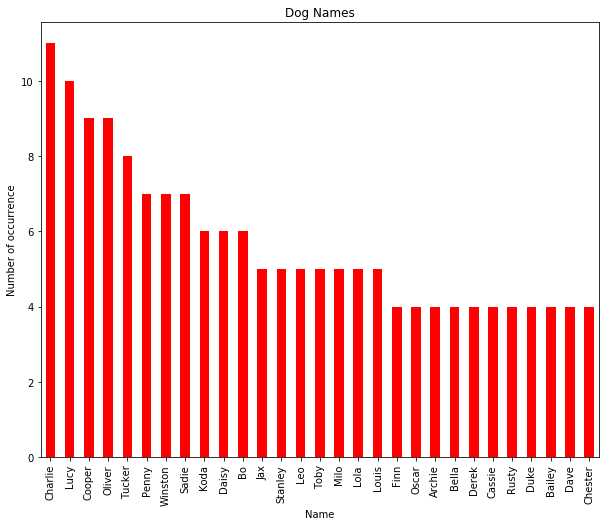

In [73]:
Dog_Names.plot(kind = 'bar', figsize = (10,8), color = 'red', title ='Dog Names')
plt.xlabel('Name')
plt.ylabel('Number of occurrence');

According to the Visual, The most popular dog name is Charlie.

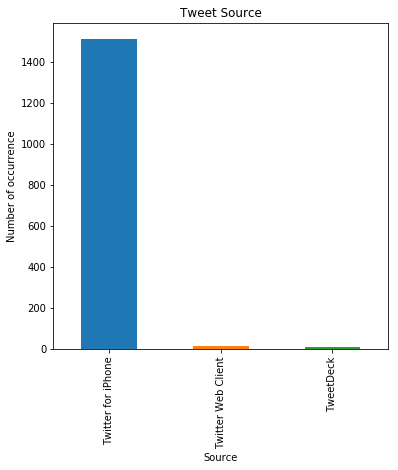

In [74]:
#major tweet source
twitter_archive_master['source'].value_counts().plot(kind = 'bar', figsize = (6,6), title ='Tweet Source')
plt.xlabel('Source')
plt.ylabel('Number of occurrence');

According to the Visual, Twitter for Iphone

In [75]:
#The dog stage distribution
twitter_archive_master['dog_stages'] = twitter_archive_master['dog_stages'].astype('category')
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1541 entries, 0 to 1540
Data columns (total 18 columns):
tweet_id              1541 non-null object
retweet_count         1541 non-null int64
favorite_count        1541 non-null int64
timestamp             1541 non-null datetime64[ns]
source                1541 non-null object
text                  1541 non-null object
rating_numerator      1541 non-null float64
rating_denominator    1541 non-null float64
name                  1541 non-null object
dog_stages            1541 non-null category
jpg_url               1541 non-null object
img_num               1541 non-null int64
Prediction1           1541 non-null object
Prediction1_dog       1541 non-null bool
Prediction2           1541 non-null object
Prediction2_dog       1541 non-null bool
Prediction3           1541 non-null object
Prediction3_dog       1541 non-null bool
dtypes: bool(3), category(1), datetime64[ns](1), float64(2), int64(3), object(8)
memory usage: 186.8+ KB


In [76]:
twitter_archive_master_stages = twitter_archive_master.groupby('dog_stages')['tweet_id'].count()
twitter_archive_master_stages

dog_stages
None       1283
doggo        69
floofer       7
pupper      161
puppo        21
Name: tweet_id, dtype: int64

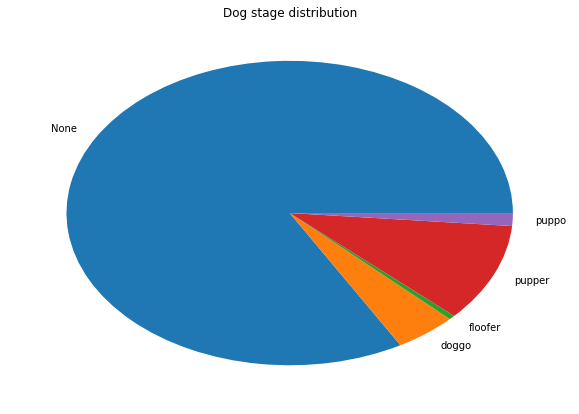

In [77]:
fig = plt.figure(figsize =(10, 7))
plt.pie(twitter_archive_master_stages,labels=['None','doggo','floofer','pupper','puppo'])
plt.title('Dog stage distribution');

The Dog stage with the highest tweets is the Pupper stage.

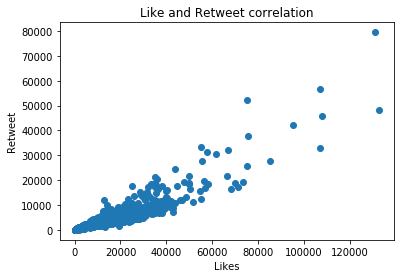

In [78]:
#Insight on whether the favorite_count has an effect on retweet_count i.e a correlation
plt.scatter(twitter_archive_master['favorite_count'],twitter_archive_master['retweet_count'])
plt.title('Like and Retweet correlation')
plt.xlabel('Likes')
plt.ylabel('Retweet');

The scatter plot shows a positive correlation between the number of likes and retweets.

In [79]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.91084203308148481

By this calculation, It shows it has a high positive correlation.

In [80]:
twitter_archive_master.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)